# Sentiment Analysis in Python

In this Notebook, a sentiment analysis of social media data will be performed to evaluate public sentiment regarding the launch of the Macbook M3 Pro. 

It will be done using NLTK's VADER (Valence Aware Dictionary and Sentiment Reasoner) technique.

### Read in Data and NLTK Basics

In [3]:
# import python libraries for handling and analysing data
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

# import the data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt


#import the natural language toolkit
import nltk

plt.style.use('ggplot')

In [4]:
# Read the data
file_path = '/Users/admin/Desktop/Sentiment Analysis of Apple M3 Pro/apple_m3_pro_reviews.csv'
datafile = pd.read_csv(file_path)
datafile.head()

,id,review_id,author_name,review_title,review_rating,review_date,review_content
0,1,R2Y840YO94QJNT,Guy Boisvert,Defective Keyboard,1,05-Apr-24,Returned to Amazon
1,2,R1TJ3JBAB212Y9,E. Simon,Big Improvement over Intel Models,5,19-Jun-24,"I purchased the 14"" model with the 18 Gb of in..."
2,3,R2IKN4C7IY9Q93,Mick Pier,Great features and long battery life.,5,31-May-24,I use this macBook mostly for photo editing an...
3,4,R1WX22WWE57KQS,Steven Rossi,Not designed like previous versions,5,19-Jul-24,I've been an Apple user since the beginning. A...
4,5,R2VI2SLQYUX0ML,Danielle Babu,Husbands Gift,5,28-May-24,My husband ordered this off of my Amazon accou...


### QUICK EDA


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

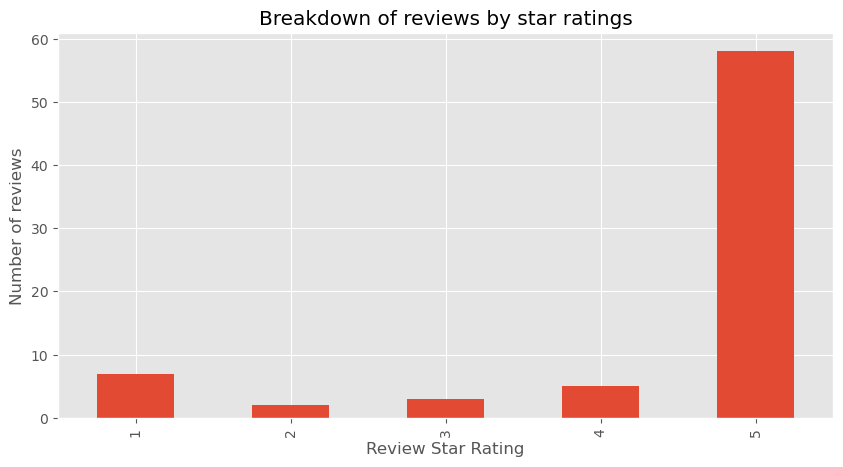

In [5]:

# Create the bar plot 
bar = datafile['review_rating'].value_counts().sort_index() \
    .plot(kind='bar', title='Breakdown of reviews by star ratings',
          figsize=(10, 5))
bar.set_xlabel('Review Star Rating')
bar.set_ylabel('Number of reviews')

# Display the plot using the data visualization tool matplotlib
plt

### BASIC NLTK


In [6]:
review_45th_customer = datafile['review_content'][45]
print(review_45th_customer)

new macbook is really beautiful, but apple really need to focus on their quality control....


###  VADER Sentiment Scoring
 
 We are going to utilize the SentimentIntensityAnalyzer to obtain the negative, neutral and positive scores of the reviews.

In [7]:

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon data
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Test the analyzer
sia.polarity_scores('I love it')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [9]:
# Test the analyzer again
sia.polarity_scores('I do not like it')

{'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}

In [10]:
# Test the analyzer using the 45th customer's review
sia.polarity_scores(review_45th_customer)

{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.3811}

In [11]:
# Run the ploarity score on the entire dataset
result = {}
for i, row in tqdm(datafile.iterrows(), total=len(datafile)):
    review = row['review_content']
    id = row['id']
    result[id] = sia.polarity_scores(review)




  0%|          | 0/75 [00:00<?, ?it/s]

In [12]:
# store in a pandas dataframe
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index' : 'id'})
vaders

,id,neg,neu,pos,compound
0,1,0.000,0.541,0.459,0.1779
1,2,0.000,1.000,0.000,0.0000
2,3,0.000,0.906,0.094,0.3612
3,4,0.000,1.000,0.000,0.0000
4,5,0.069,0.622,0.309,0.9682
...,...,...,...,...,...
70,71,0.246,0.634,0.120,-0.5548
71,72,0.231,0.769,0.000,-0.7970
72,73,0.000,1.000,0.000,0.0000
73,74,0.055,0.821,0.124,0.4215


In [13]:
# Merge the datafile with the vaders table
vaders = vaders.merge(datafile, how='left')
vaders.head()

,id,neg,neu,pos,compound,review_id,author_name,review_title,review_rating,review_date,review_content
0,1,0.000,0.541,0.459,0.1779,R2Y840YO94QJNT,Guy Boisvert,Defective Keyboard,1,05-Apr-24,Returned to Amazon
1,2,0.000,1.000,0.000,0.0000,R1TJ3JBAB212Y9,E. Simon,Big Improvement over Intel Models,5,19-Jun-24,"I purchased the 14"" model with the 18 Gb of in..."
2,3,0.000,0.906,0.094,0.3612,R2IKN4C7IY9Q93,Mick Pier,Great features and long battery life.,5,31-May-24,I use this macBook mostly for photo editing an...
3,4,0.000,1.000,0.000,0.0000,R1WX22WWE57KQS,Steven Rossi,Not designed like previous versions,5,19-Jul-24,I've been an Apple user since the beginning. A...
4,5,0.069,0.622,0.309,0.9682,R2VI2SLQYUX0ML,Danielle Babu,Husbands Gift,5,28-May-24,My husband ordered this off of my Amazon accou...


### Plot VADER results

Text(0.5, 1.0, 'Compound ratings of Macbook M3 Pro by Amazon review')

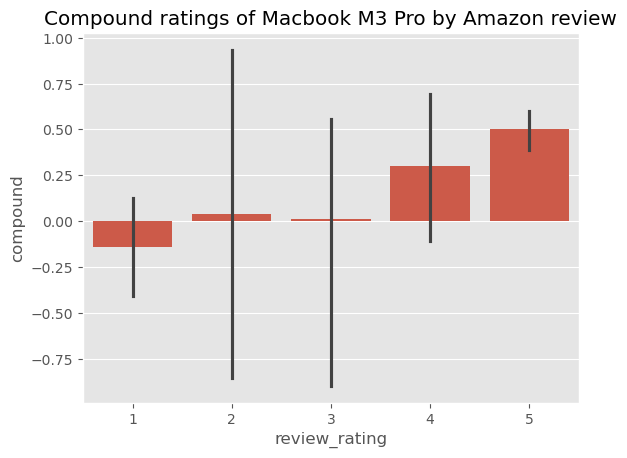

In [14]:
# plot the result using the data visualization tool Seaborn
plot = sns.barplot(data=vaders, x='review_rating', y='compound')
plot.set_title("Compound ratings of Macbook M3 Pro by Amazon review")

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

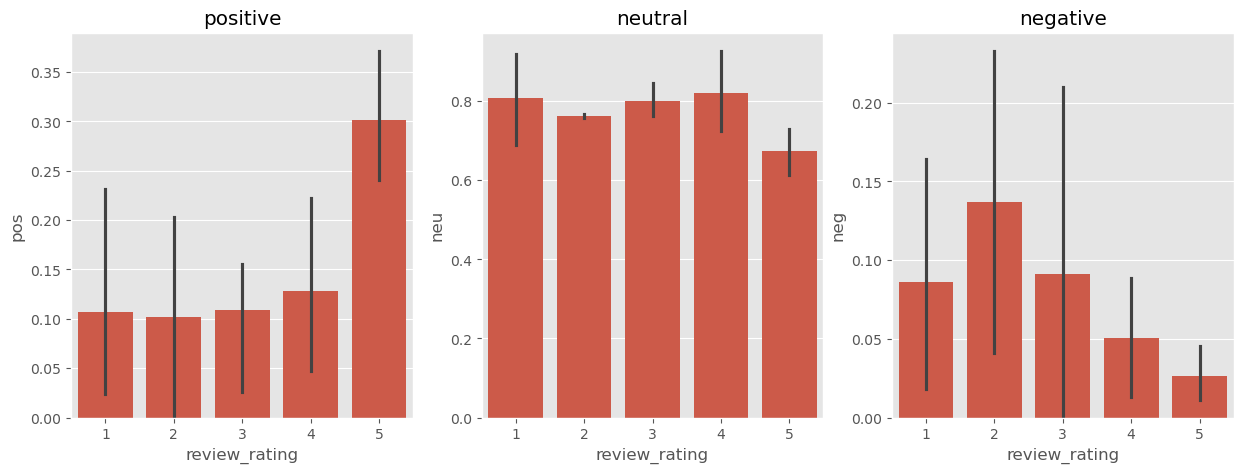

In [15]:
# use matplotlib subplot to section 
fig, plot = plt.subplots(1, 3, figsize=(15, 5))

# plot the positive, neutral and negative review ratings
sns.barplot(data=vaders, x='review_rating', y='pos', ax=plot[0])
sns.barplot(data=vaders, x='review_rating', y='neu', ax=plot[1])
sns.barplot(data=vaders, x='review_rating', y='neg', ax=plot[2])

# Set titles for each subplot
plot[0].set_title('positive')
plot[1].set_title('neutral')
plot[2].set_title('negative')

# do a tight layout to avoid overlapping of the y axis labels
plt.tight_layout
plt